# <font color='Blue'>Ciência de Dados</font>

### <font color='GREY'> Sistema de Classificação de Risco para Concessão de Empréstimo </font>  




![alt text](https://webcomicms.net/sites/default/files/clipart/144257/animated-computer-pictures-144257-637982.gif)
![alt text](https://blog.megaconsultas.com.br/wp-content/uploads/2019/06/Recuperar-o-Score-de-Cr%C3%A9dito.gif)


# <font color='Black'> **Aula 1 - Usando Dados para Resolver Problemas com Ciência de Dados** </font>

#1° Problema de Negócio 

Nesse caso prático, nós precisamos construir um Sistema de classificação de Risco do cliente para aprovação de empréstimos.


![alt text](https://www.goias.gov.br/images/uploads/2017/04/Risco-de-Cr%C3%A9dito-finan%C3%A7as-contas.png)

##### **Fonte dos Dados**

Usaremos a base de dados "**risco.csv**" originada por meio dos dados da **UCI Machine Learning**.

 Nesse portal a gente consegue realizar o download de vários datasets reais de empresas de todo o Mundo.

**Link**:

https://archive.ics.uci.edu/ml/index.php

###### **Arquitetura dos Dados** (AD)

* **id_cliente**  : Número de identificação única do cliente
* **inad**        : Índice de inadimplência do cliente
* **Saldo_contas**: Índice referente aos saldos das contas corrente, poupança e aplicações do cliente
* **Class_Renda** : Índice referente à classificação do cliente de acordo com sua renda.
* **Anotações**   : Índice referente às anotações externas à empresa, tais como anotações SERASA / SPC / BACEN 
* **Risco**       : Risco do Cliente atribuído dadas as variáveis de análise do cliente

# 2° Análise Exploratória dos Dados


In [1]:
# Importando Bibliotecas Essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# Se conectando com os dados - Nesse caso, a Fonte de Dados é um Arquivo
dataset = pd.read_csv('risco.csv')

# Informações básicas
print(f'Registros: {len(dataset)}\nVariáveis: {len(dataset.columns)}')

# Mostrar todas as colunas da base:
pd.set_option('display.max_columns', None)


Registros: 150
Variáveis: 6


In [3]:
# Imprime na Tela os primeiros registros
dataset.head()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto


In [4]:
dataset.sample(5).T

,124,23,117,51,46
id_cliente,124,23,117,51,46
anot_cadastrais,6.7,5.1,7.7,6.4,5.1
indice_inad,3.3,3.3,3.8,3.2,3.8
class_renda,5.7,1.7,6.7,4.5,1.6
saldo_contas,2.1,0.5,2.2,1.5,0.2
Risco,Risco_Baixo,Risco_Alto,Risco_Baixo,Risco_Medio,Risco_Alto


In [5]:
dataset.tail()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
145,145,6.7,3.0,5.2,2.3,Risco_Baixo
146,146,6.3,2.5,5.0,1.9,Risco_Baixo
147,147,6.5,3.0,5.2,2.0,Risco_Baixo
148,148,6.2,3.4,5.4,2.3,Risco_Baixo
149,149,5.9,3.0,5.1,1.8,Risco_Baixo


In [6]:
# Informações do Dataset - Tipo das Variáveis, Quantidade de linhas (registros) e colunas (variáveis/features)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       150 non-null    int64  
 1   anot_cadastrais  150 non-null    float64
 2   indice_inad      150 non-null    float64
 3   class_renda      150 non-null    float64
 4   saldo_contas     150 non-null    float64
 5   Risco            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
## Pandas Profiling Relatório

from pandas_profiling import ProfileReport
import pandas_profiling

profile = ProfileReport(dataset, title='Relatório Classificação Risco', html={'style':{'full_width':True}})

profile.to_notebook_iframe()

profile.to_file(output_file="Relatório Classificação Risco")

In [8]:
import sweetviz as sv
## ## Sweetviz  Relatório
my_report = sv.analyze(dataset) # cria o reporte e chama de my_report
my_report.show_html()

# sv.anlyze(dataset).show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
#Verifica as dimensões do dataset (antes de vírgula são linhas    ,     depois da vírgula são colunas)
dataset.shape

(150, 6)

In [10]:
# Cria uma função para imprimir na tela o resultado da função SHAPE
print(f"O Dataset tem {dataset.shape[0]} linhas e {dataset.shape[1]} colunas.")

O Dataset tem 150 linhas e 6 colunas.


In [11]:
# transforma as colunas em lista
dataset.columns.tolist()

['id_cliente',
 'anot_cadastrais',
 'indice_inad',
 'class_renda',
 'saldo_contas',
 'Risco']

In [12]:
#Removendo duplicatas se houver
dataset.drop_duplicates(keep=False, inplace=True)

In [13]:
#Estatísticas descritivas das variáveis numéricas
dataset.describe().round(2)

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
count,150.00,150.00,150.00,150.00,150.00
mean,74.50,5.84,3.05,3.76,1.20
std,43.45,0.83,0.43,1.76,0.76
min,0.00,4.30,2.00,1.00,0.10
25%,37.25,5.10,2.80,1.60,0.30
50%,74.50,5.80,3.00,4.35,1.30
75%,111.75,6.40,3.30,5.10,1.80
max,149.00,7.90,4.40,6.90,2.50


In [14]:
#Matriz de correlação - person
dataset.corr().round(4)

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
id_cliente,1.0000,0.7167,-0.3977,0.8827,0.8998
anot_cadastrais,0.7167,1.0000,-0.1094,0.8718,0.8180
indice_inad,-0.3977,-0.1094,1.0000,-0.4205,-0.3565
class_renda,0.8827,0.8718,-0.4205,1.0000,0.9628
saldo_contas,0.8998,0.8180,-0.3565,0.9628,1.0000


In [15]:
# Correlação de spearman - leva em consideração  a correlação positiva e negativa
dataset.corr('spearman').round(4)

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
id_cliente,1.0000,0.7341,-0.4115,0.8685,0.8790
anot_cadastrais,0.7341,1.0000,-0.1595,0.8814,0.8344
indice_inad,-0.4115,-0.1595,1.0000,-0.3034,-0.2775
class_renda,0.8685,0.8814,-0.3034,1.0000,0.9360
saldo_contas,0.8790,0.8344,-0.2775,0.9360,1.0000


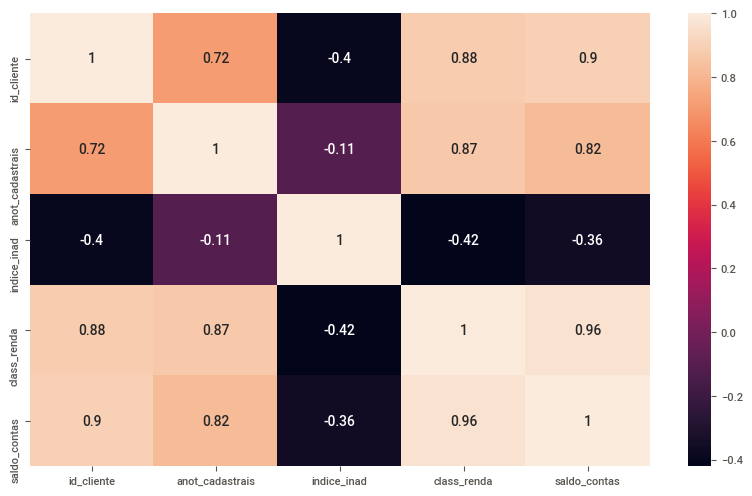

In [16]:
# Mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),annot=True);

                 id_cliente  anot_cadastrais  indice_inad  class_renda  \
id_cliente         1.000000         0.716676    -0.397729     0.882747   
anot_cadastrais    0.716676         1.000000    -0.109369     0.871754   
indice_inad       -0.397729        -0.109369     1.000000    -0.420516   
class_renda        0.882747         0.871754    -0.420516     1.000000   
saldo_contas       0.899759         0.817954    -0.356544     0.962757   

                 saldo_contas  
id_cliente           0.899759  
anot_cadastrais      0.817954  
indice_inad         -0.356544  
class_renda          0.962757  
saldo_contas         1.000000  


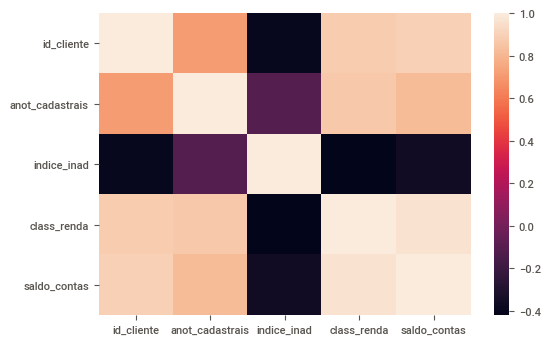

In [17]:
corr = dataset.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns);

In [18]:
# Verifique o número de valores diferentes em cada coluna.
dataset.nunique()

id_cliente         150
anot_cadastrais     35
indice_inad         23
class_renda         43
saldo_contas        22
Risco                3
dtype: int64

In [19]:
# retorna a quantidade de linha de todas as colunas
dataset.count()

id_cliente         150
anot_cadastrais    150
indice_inad        150
class_renda        150
saldo_contas       150
Risco              150
dtype: int64

In [20]:
# Tabela de Frequência da Variável "risco" - Nossa Classe ou Label ou Target
dataset['Risco'].value_counts()

Risco_Medio    50
Risco_Alto     50
Risco_Baixo    50
Name: Risco, dtype: int64

In [21]:
dataset['Risco'].unique()

array(['Risco_Alto', 'Risco_Medio', 'Risco_Baixo'], dtype=object)

In [22]:
# Forma adicional de criar a Tab. de Frequência
dataset.Risco.value_counts()

Risco_Medio    50
Risco_Alto     50
Risco_Baixo    50
Name: Risco, dtype: int64

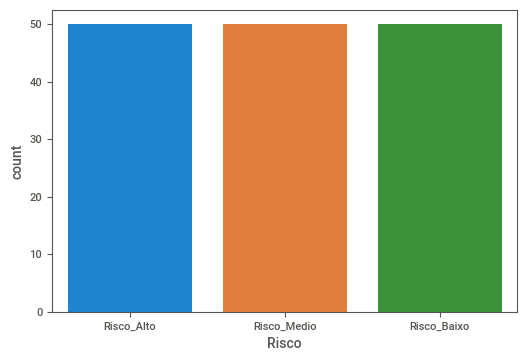

In [23]:
# Cria um gráfico de barras da variável Target
sns.countplot(dataset['Risco']);

In [24]:
len(dataset)

150

In [25]:
# Check for missing values
dataset.isna().sum()

id_cliente         0
anot_cadastrais    0
indice_inad        0
class_renda        0
saldo_contas       0
Risco              0
dtype: int64

In [26]:
# é ou não é missing?
dataset.isna()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [27]:
# Consultando linhas com valore faltantes.
dataset.isnull().sum().sort_values(ascending=False)

Risco              0
saldo_contas       0
class_renda        0
indice_inad        0
anot_cadastrais    0
id_cliente         0
dtype: int64

In [28]:
#Eliminar a coluna de identificação, pois ela não é variável explicativa, é somente a identificação do cliente7
dataset = dataset.drop(columns='id_cliente')

In [29]:
#Printa o dataset na tela
dataset

,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,5.1,3.5,1.4,0.2,Risco_Alto
1,4.9,3.0,1.4,0.2,Risco_Alto
2,4.7,3.2,1.3,0.2,Risco_Alto
3,4.6,3.1,1.5,0.2,Risco_Alto
4,5.0,3.6,1.4,0.2,Risco_Alto
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Risco_Baixo
146,6.3,2.5,5.0,1.9,Risco_Baixo
147,6.5,3.0,5.2,2.0,Risco_Baixo
148,6.2,3.4,5.4,2.3,Risco_Baixo


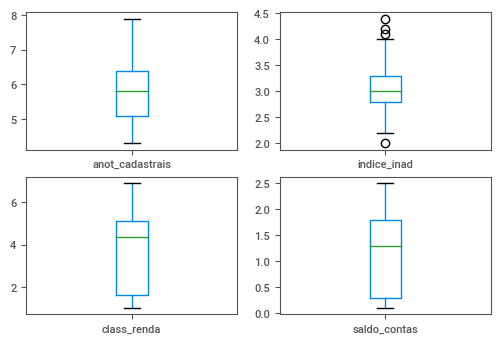

In [30]:
# Cria um gráfico tipo box and whisker plots (o famoso boxplot)
from matplotlib import pyplot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

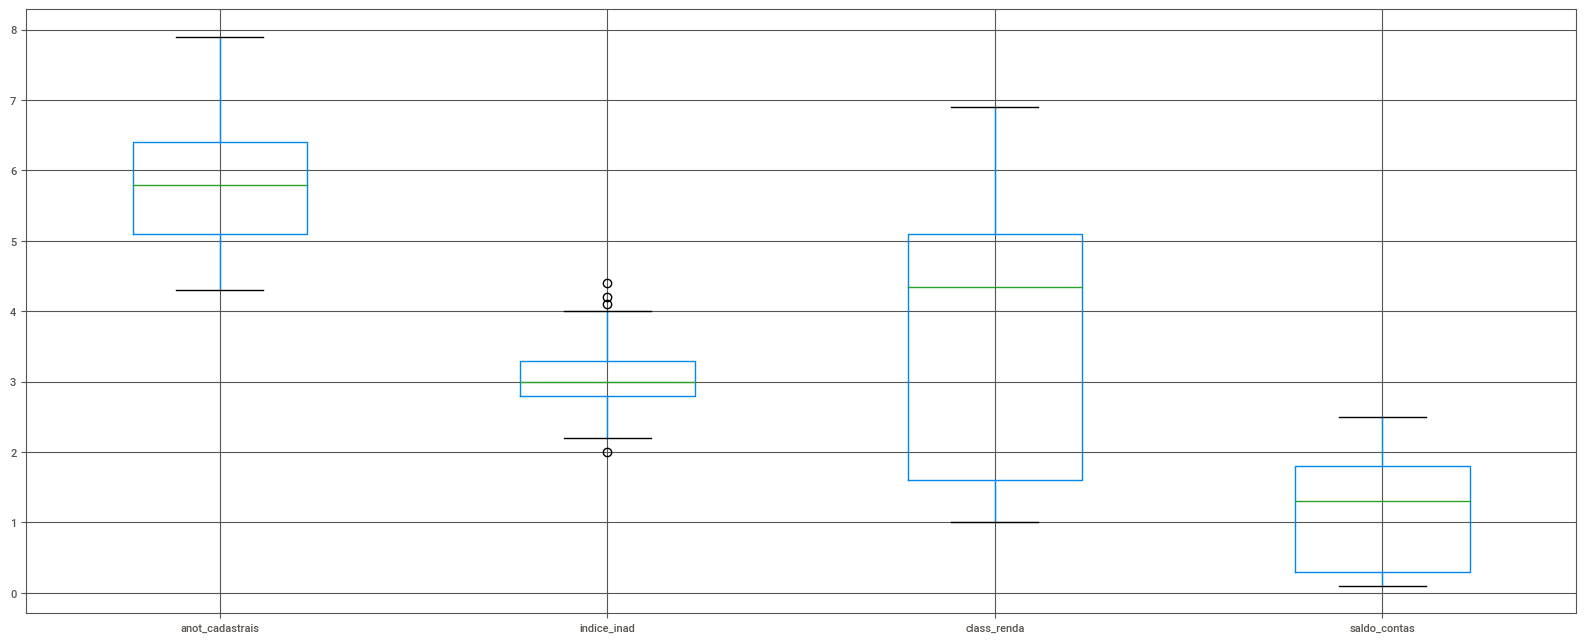

In [31]:
dataset.boxplot(figsize=(20,8));

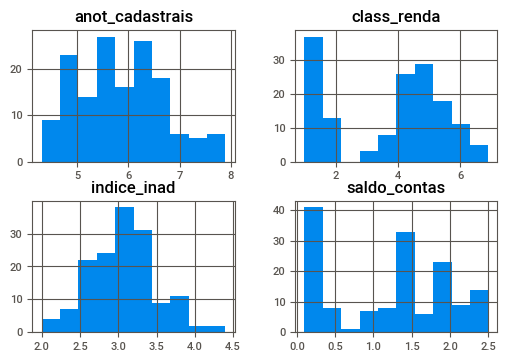

In [32]:
#cria um gráfico conhecido como histohrama
dataset.hist()
plt.show()

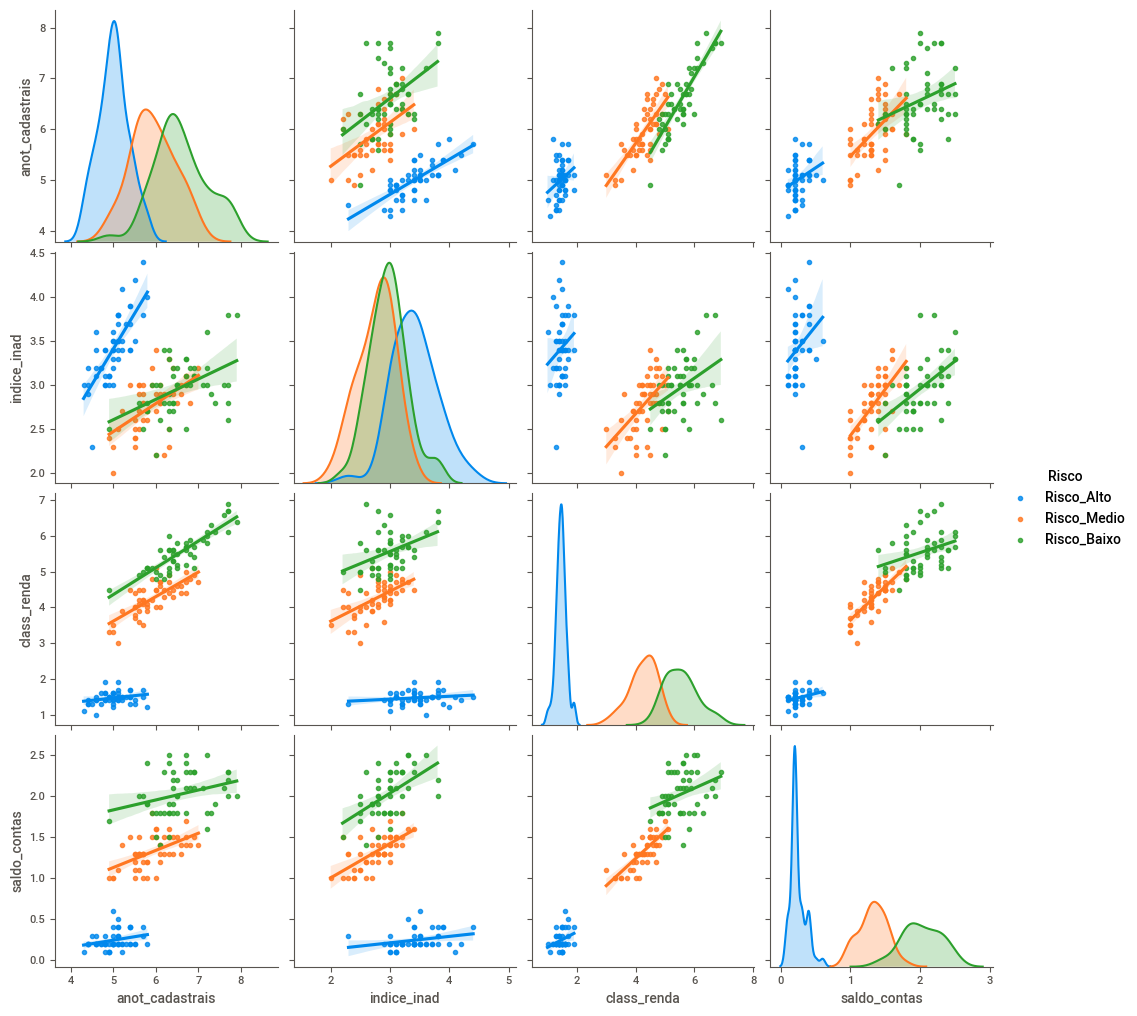

In [33]:
# Criação do Gráfico de dispersão (scatter) conhecido como pairplot
sns.pairplot(dataset, hue='Risco', kind="reg"); # kind=reg é a reta de regressão

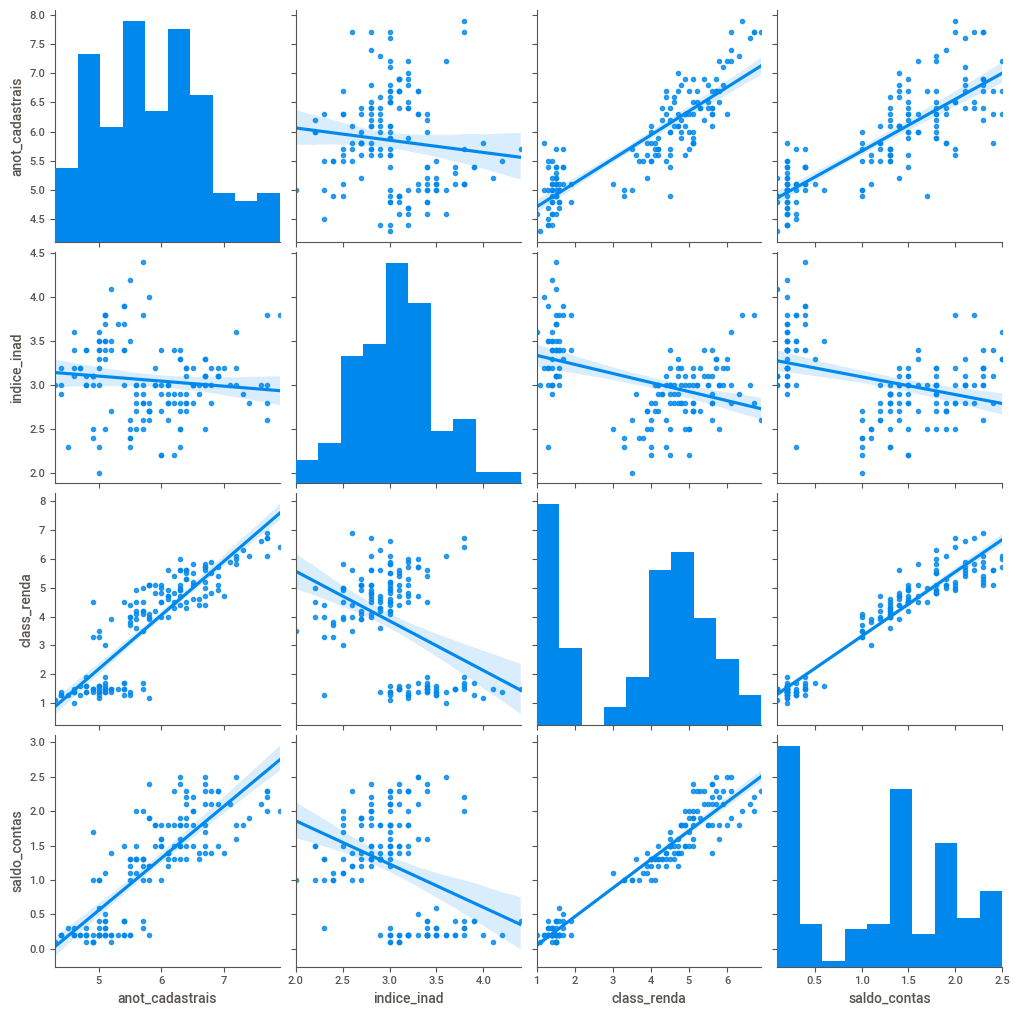

In [34]:
# Criação do Gráfico de dispersão sem agregar pelo TARGET
sns.pairplot(dataset,kind="reg");

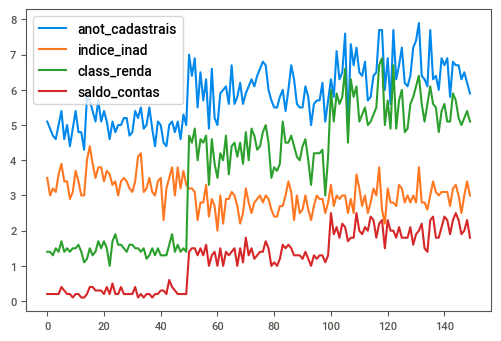

In [35]:
dataset.plot();

In [36]:
dataset.head()

,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,5.1,3.5,1.4,0.2,Risco_Alto
1,4.9,3.0,1.4,0.2,Risco_Alto
2,4.7,3.2,1.3,0.2,Risco_Alto
3,4.6,3.1,1.5,0.2,Risco_Alto
4,5.0,3.6,1.4,0.2,Risco_Alto


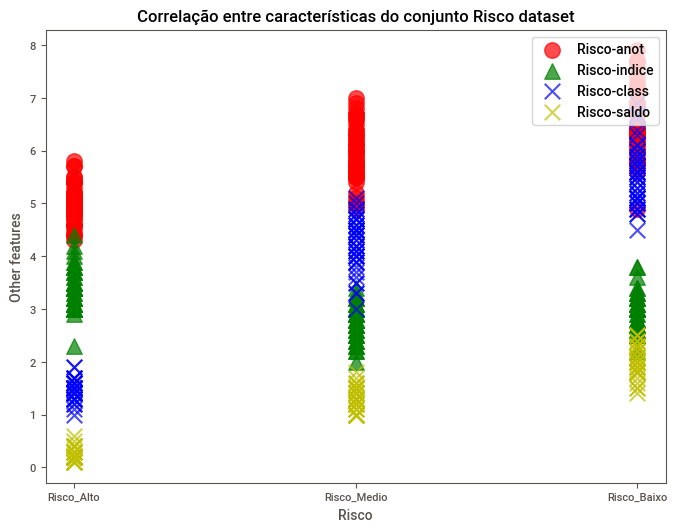

In [37]:
# gerar gráficos de dispersão para encontrar a correlação entre as diferentes características

plt.figure(figsize=(8,6))

plt.scatter(dataset['Risco'], dataset['anot_cadastrais'], marker = 'o', color= 'r', alpha= 0.7, s= 124, label= "Risco-anot")
plt.scatter(dataset['Risco'], dataset['indice_inad'], marker = '^', color= 'g', alpha= 0.7, s= 124, label= "Risco-indice")
plt.scatter(dataset['Risco'], dataset['class_renda'], marker = 'x', color= 'b', alpha= 0.7, s= 124, label= "Risco-class")
plt.scatter(dataset['Risco'], dataset['saldo_contas'], marker = 'x', color= 'y', alpha= 0.7, s= 124, label= "Risco-saldo")

plt.title('Correlação entre características do conjunto Risco dataset')

plt.xlabel('Risco')
plt.ylabel('Other features')

plt.legend(loc='upper right')

plt.show();

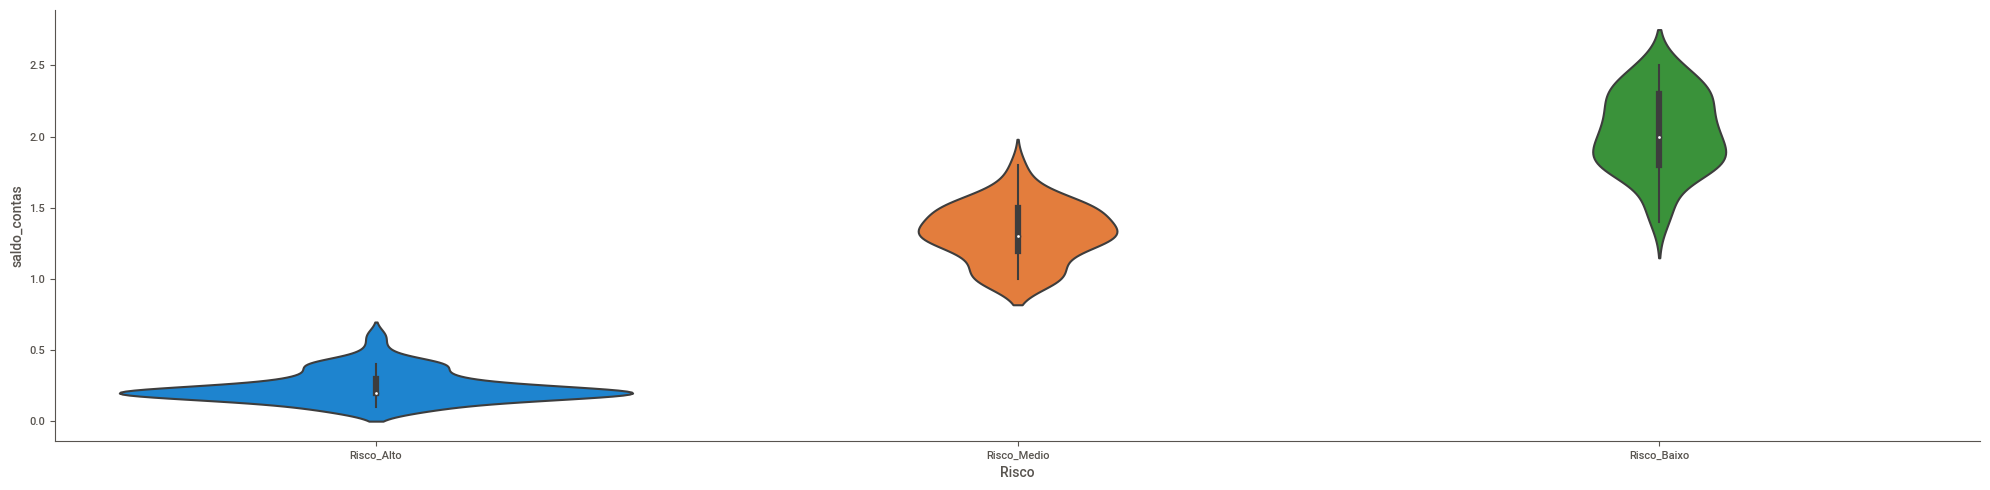

In [38]:
sns.catplot(x = 'Risco',y = 'saldo_contas',kind = 'violin',data = dataset,aspect=4);

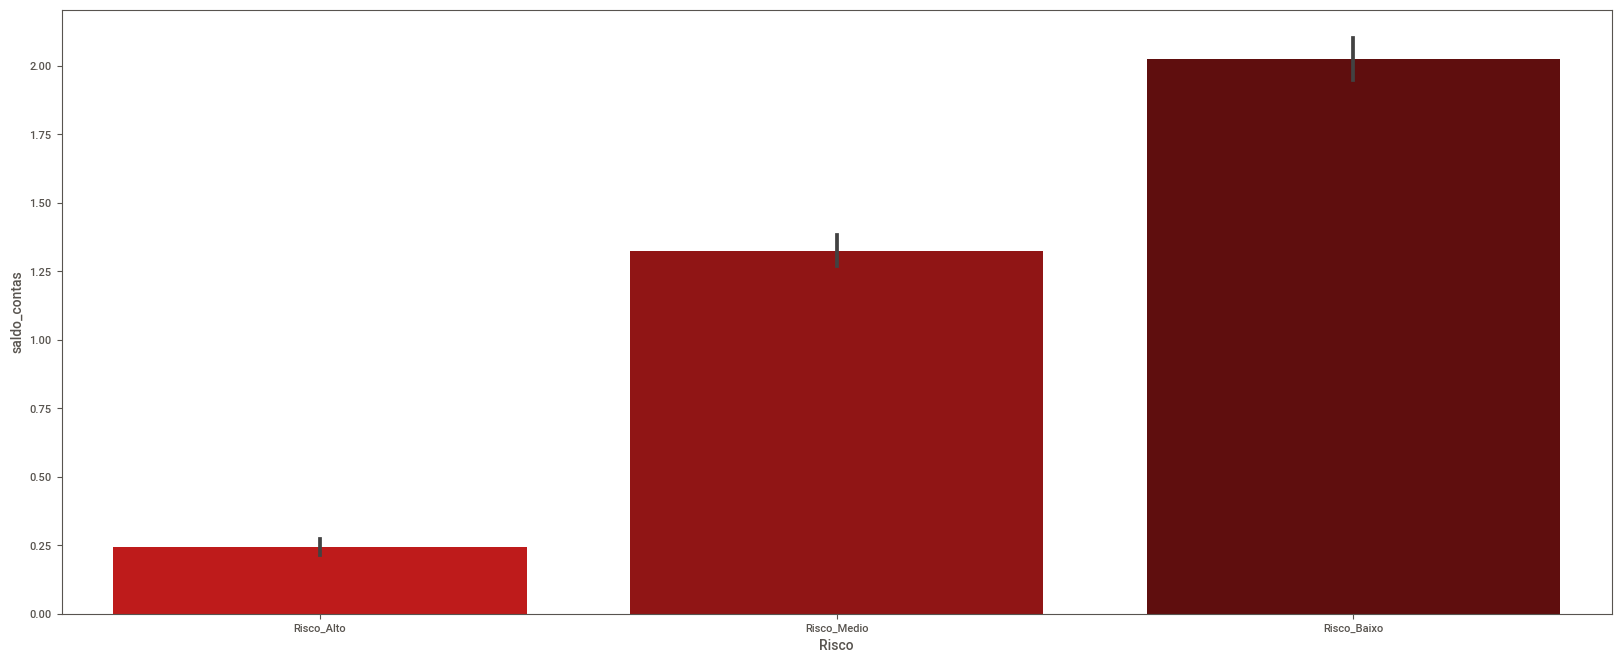

In [39]:
plt.figure(figsize=(20,8))
sns.barplot(y='saldo_contas',x='Risco',data=dataset,palette='flag');

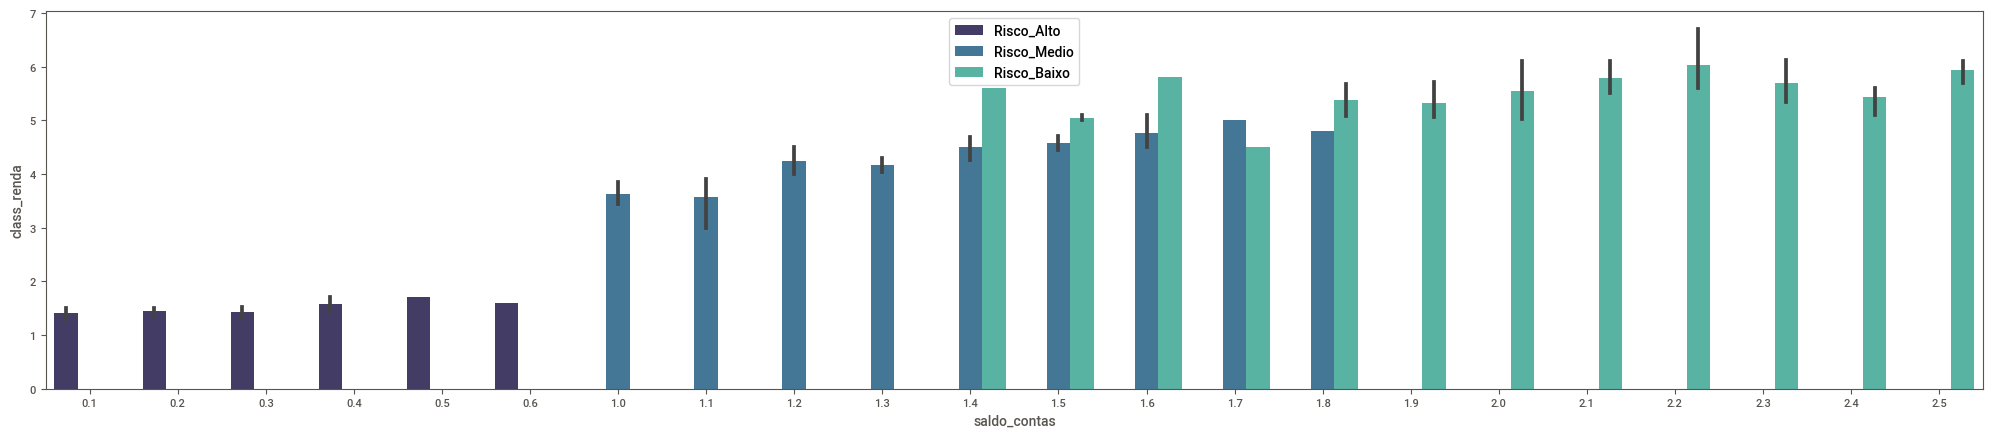

In [40]:
plt.figure(figsize=(25,5))
sns.barplot('saldo_contas','class_renda',hue='Risco',data=dataset,palette='mako')
plt.legend();

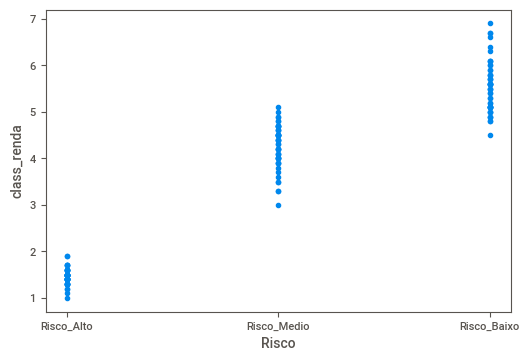

In [41]:
plt.scatter(dataset.Risco,dataset.class_renda)
plt.xlabel('Risco')
plt.ylabel('class_renda');

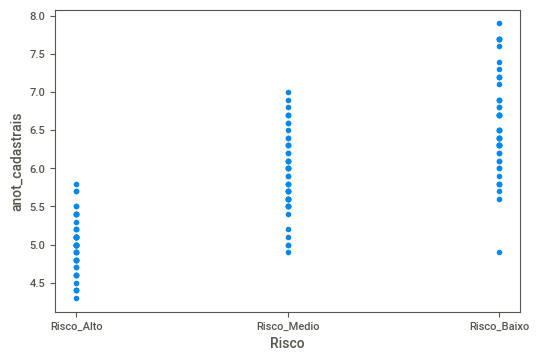

In [42]:
plt.scatter(dataset.Risco,dataset.anot_cadastrais)
plt.xlabel('Risco')
plt.ylabel('anot_cadastrais');

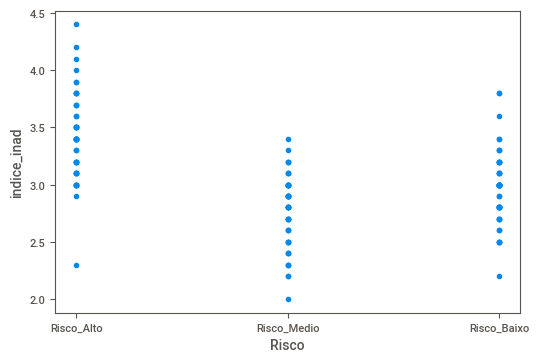

In [43]:
plt.scatter(dataset.Risco,dataset.indice_inad)
plt.xlabel('Risco')
plt.ylabel('indice_inad');

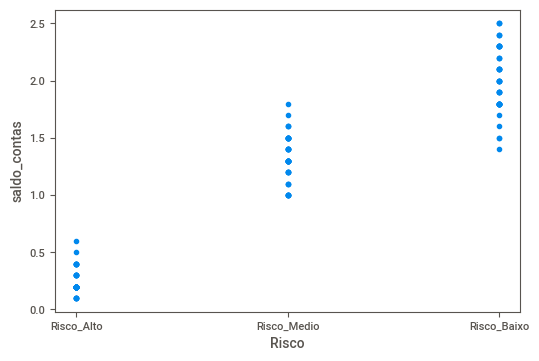

In [44]:
plt.scatter(dataset.Risco,dataset.saldo_contas)
plt.xlabel('Risco')
plt.ylabel('saldo_contas');

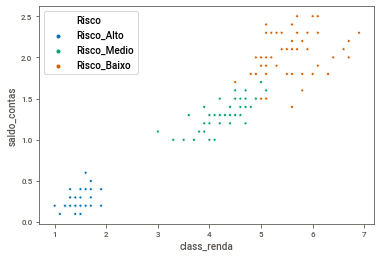

In [45]:
%matplotlib inline
import seaborn as sns
from matplotlib import style
style.use("seaborn-colorblind")
sns.scatterplot(data= dataset, x='class_renda', y='saldo_contas', cmap='Accent_r', hue='Risco');

In [46]:
dataset.columns

Index(['anot_cadastrais', 'indice_inad', 'class_renda', 'saldo_contas',
       'Risco'],
      dtype='object')

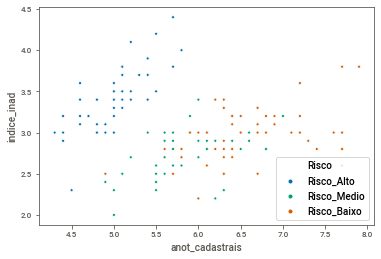

In [47]:
%matplotlib inline
import seaborn as sns
from matplotlib import style
style.use("seaborn-colorblind")
sns.scatterplot(data= dataset, x='anot_cadastrais', y='indice_inad', cmap='Accent_r', hue='Risco');

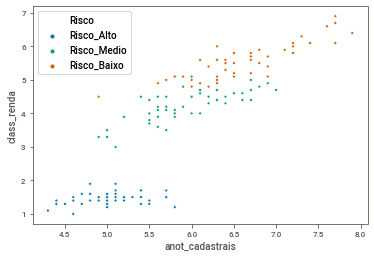

In [48]:
%matplotlib inline
import seaborn as sns
from matplotlib import style
style.use("seaborn-colorblind")
sns.scatterplot(data= dataset, x='anot_cadastrais', y='class_renda', cmap='Accent_r', hue='Risco');

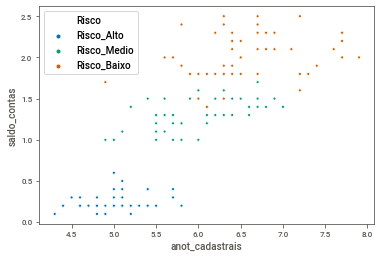

In [49]:
%matplotlib inline
import seaborn as sns
from matplotlib import style
style.use("seaborn-colorblind")
sns.scatterplot(data= dataset, x='anot_cadastrais', y='saldo_contas', cmap='Accent_r', hue='Risco');

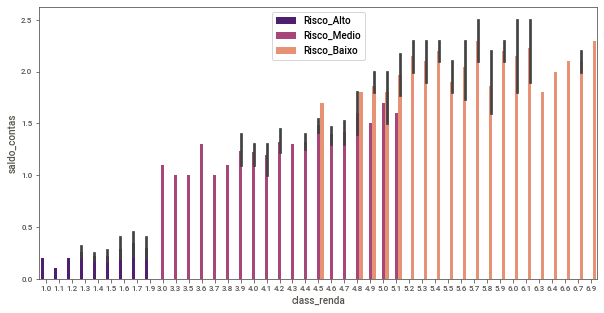

In [50]:
# O tipo de local Tier-3 possui todos os tipos de ponto de venda e tem alta margem de vendas
plt.figure(figsize=(10,5))
sns.barplot('class_renda','saldo_contas',hue='Risco',data=dataset,palette='magma')
plt.legend();

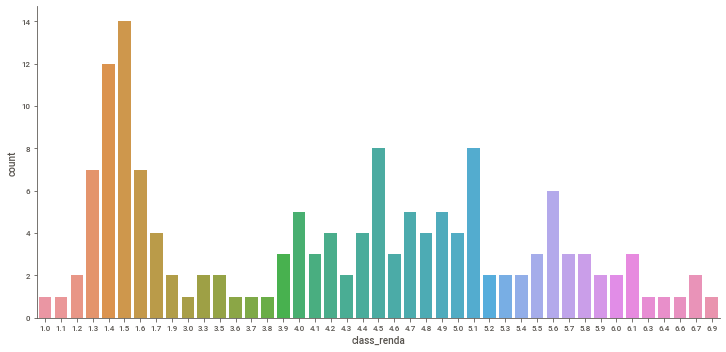

In [51]:
# por class_renda
sns.catplot('class_renda',kind = 'count',data = dataset,aspect = 2);

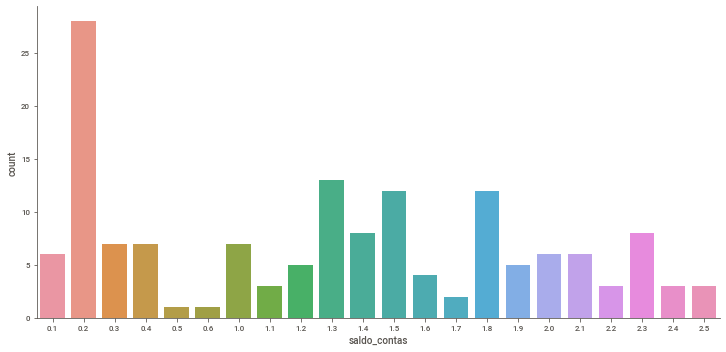

In [52]:
# por saldo_contas
sns.catplot('saldo_contas',kind = 'count',data = dataset,aspect = 2);

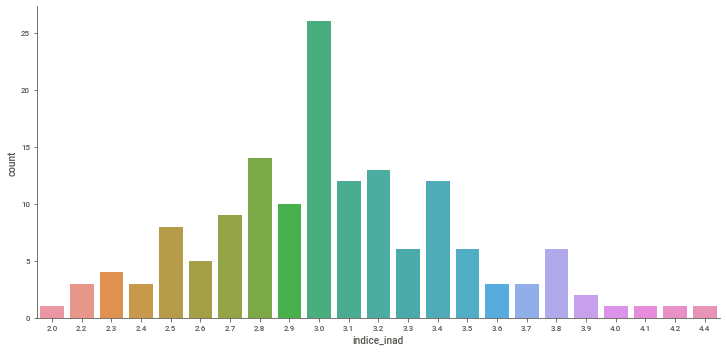

In [53]:
# por indice_inad
sns.catplot('indice_inad',kind = 'count',data = dataset,aspect = 2);

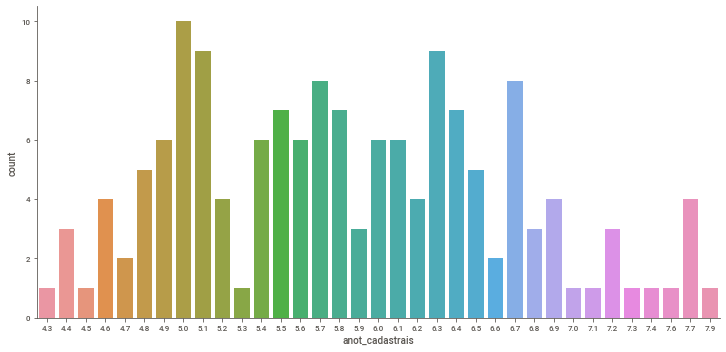

In [54]:
# por anot_cadastrais
sns.catplot('anot_cadastrais',kind = 'count',data = dataset,aspect = 2);


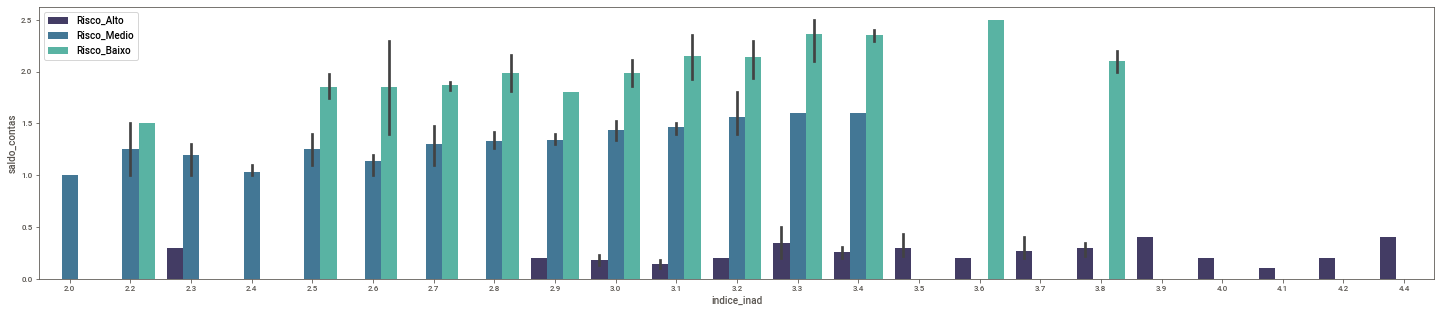

In [55]:
plt.figure(figsize=(25,5))
sns.barplot('indice_inad','saldo_contas',hue='Risco',data=dataset,palette='mako')
plt.legend();

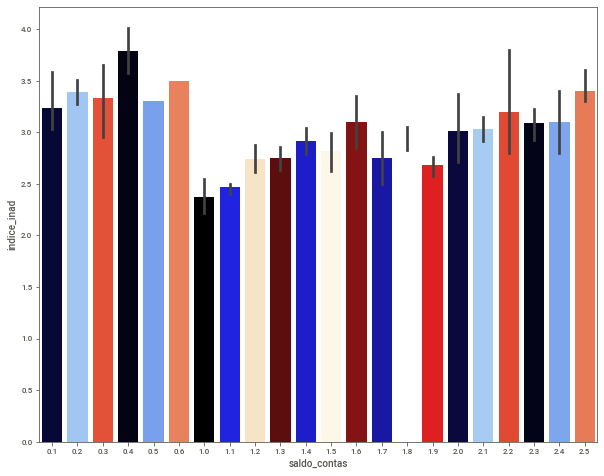

In [56]:
plt.figure(figsize=(10,8))
sns.barplot(y='indice_inad',x='saldo_contas',data=dataset,palette='flag');

# 3° Pré-Processamento dos Dados

In [57]:
#3 Separando as Variáveis de Entrada e Saída do Modelo
# viajando pelo indece com iloc
X = dataset.iloc[:,:-1].values  #variáveis independentes(todas as colunas ,menos a ultima)
y = dataset.iloc[:,-1].values  #Target/labe/class/vairável dependente(so a ultima colunas)

In [58]:
#Print das variáveis X e Y
# 
print("\nVariáveis de Entrada da avaliação:\n\n", X[:3])
print("\nRisco - Variável a ser Predita :\n\n", y[:3])


Variáveis de Entrada da avaliação:

 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Risco - Variável a ser Predita :

 ['Risco_Alto' 'Risco_Alto' 'Risco_Alto']


In [59]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [60]:
y

array(['Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Medio', 'Risco_Medio',
       'Risco_Medio', 'Risco_Medio', 'Risco_Medio', 'Risco_Medio',
       'Risco_Medio', 'Risco_Medio', 'Risco_Medio', 'Risco_Medio',
       'Risco_Medio', 'Risco_Medio', 'Risco_M

### Separando os dados entre Treino e Teste

In [61]:
#Divide o dataset em Train and Test 
# 20% teste   e  80% treino
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state = 7) 

In [62]:
# 
print("Dados de Treino :\n----------------\n")
print("X = \n", X_train[:2])
print("y = \n", y_train[:2])

print("\n\nDados de Teste :\n----------------\n")
print("X = \n",X_test[:2])
print("y = \n", y_test[:2])

Dados de Treino :
----------------

X = 
 [[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1. ]]
y = 
 ['Risco_Baixo' 'Risco_Medio']


Dados de Teste :
----------------

X = 
 [[5.9 3.  5.1 1.8]
 [5.4 3.  4.5 1.5]]
y = 
 ['Risco_Baixo' 'Risco_Medio']


In [63]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (120, 4)
Shape dos dados de teste é (30, 4)


### Padronizando as Features - As variáveis explicativas (variáveis de entrada)


In [64]:
#Redimensionando os dados - PADRONIZAÇÂO - Feature scaling
# tratamento variaveis com outloier
# aplica uma formula e faz calulo de padronização - tira a media do valor e divide pelo desvio padrao
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


--------------------------------
Dataset depois da padronização:
--------------------------------


X_train :
 [[ 0.43325894 -0.59653573  0.62601116  0.82081788]
 [-0.15754871 -1.05688485 -0.09737951 -0.21464226]
 [-1.45732553  1.24486074 -1.48851543 -1.2501024 ]
 [ 1.26038965  0.09398794  0.95988378  1.20911544]
 [ 0.669582   -0.36636117  0.34778398  0.17365529]]
-------------------------

X_test :
 [[ 0.07877435 -0.13618661  0.79294747  0.82081788]
 [-0.51203329 -0.13618661  0.45907485  0.43252033]
 [-0.98467941  1.01468618 -1.32157912 -1.12066988]
 [-0.27571024 -0.13618661  0.45907485  0.43252033]
 [-1.10284094 -1.28705941  0.45907485  0.69138537]]


# <font color='Black'> **Aula 2 - Construíndo Máquinas Preditivas** </font>

# 4° Construindo a Máquina Preditiva

### 1° Versão da Máquina Preditiva: Criando um **baseline**

Aqui nós vamos criar a primeira versão da Máquina Preditiva. Depois, vamos buscar formas de melhorar a assertividade do modelo. 

In [65]:
# Importando a Biblioteca KNN
from sklearn.neighbors import KNeighborsClassifier
Maquina_Preditiva = KNeighborsClassifier(n_neighbors=30) #[1,10,30,50]


In [66]:
#Treinando a Máquina preditiva com os dados de treino
Maquina_Preditiva = Maquina_Preditiva.fit(X_train,y_train)


In [67]:
#Fazendo novas Previsões com os dados de teste
y_pred = Maquina_Preditiva.predict(X_test)


print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_test)

print("\n---------------------------\n")
print("Valores Preditos com a Máquina Preditiva com dados de Teste :\n",y_pred)


---------------------------

Valores Reais com dados de teste :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']

---------------------------

Valores Preditos com a Máquina Preditiva com dados de Teste :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Medio'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [68]:
#Função que mostra os hyperparâmetros utilizados na construção da Máquina Preditiva 
Maquina_Preditiva.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=30)>

# 5° Avaliando a Máquina Preditiva

In [69]:
# Calculando a Acurácia
# total de acertos, divido pelo total geral
from sklearn import metrics
print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)

Acurácia da Máquina =  80.0


In [70]:
# Comparando Real e Predito com dados de Teste
print("\nReal vs Predito \n------------------------------\n")
error_df = pd.DataFrame({"Real" : y_test,
                         "Predito" : y_pred})

error_df.head(5)


Real vs Predito 
------------------------------



,Real,Predito
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Medio


In [71]:
#Usando a confusion matrix  e o classification report para avaliar a acurácia e demais indicadores
# ver todos erros e acertos do modelo (confusion matrix )
# traz algumas outra metrica para avaliar (classification report)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)


Acurácia da Máquina =  80.0
[[7 0 0]
 [0 8 3]
 [0 3 9]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.73      0.73      0.73        11
 Risco_Medio       0.75      0.75      0.75        12

    accuracy                           0.80        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.80      0.80      0.80        30



### 2° Versão da Máquina Preditiva: Máquina Definitiva 

In [72]:
# Importando a Biblioteca do SVM
# calcula vetores de suporte
# traz melhor divisao 
from sklearn.svm import SVC
classifier = SVC(kernel='linear',             # ['linear', 'rbf']
                 gamma= 1e-5  ,               # [1e-1, 1e-2, 1e-3, 1e-5]
                 C=10,                        # [10.0, 100.0, 1000.0, 10000.0]
                 random_state=7)



In [73]:
#Treinando a Máquina com o SVC
classifier.fit(X_train,y_train)


SVC(C=10, gamma=1e-05, kernel='linear', random_state=7)

In [74]:
#Fazendo novas previsões com os dados de teste
y_pred = classifier.predict(X_test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",y_pred)
print("\n---------------------------\n")
print("Actual Values for Test Set :\n",y_test)


---------------------------

Predicted Values for Test Set :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']

---------------------------

Actual Values for Test Set :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [75]:
#Imprimindo os hyperparâmetros utilizados na criação da Maquina Preditiva Definitiva
classifier

SVC(C=10, gamma=1e-05, kernel='linear', random_state=7)

In [76]:
# Calculando a Acurácia da Máquina Preditiva
from sklearn import metrics
print("Prediction Accuracy = ", metrics.accuracy_score(y_test, y_pred))

# Comparando valores Reais com Preditos pela Máquina
print("\nActual vs Predicted  \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred})

error_df.head(5)

Prediction Accuracy =  0.9333333333333333

Actual vs Predicted  
------------------------------



,Actual,Predicted
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Baixo


In [77]:

#Usando a confusion matrix e o classification report para avaliar a Máquina
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)

In [78]:
# Imprimindo a Confusion Matrix e o Classification Report
print(cm)
print(cr)

[[ 7  0  0]
 [ 0 11  0]
 [ 0  2 10]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.85      1.00      0.92        11
 Risco_Medio       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



# <font color='Black'> **Aula 3 - Criando uma Aplicação WEB com sua Máquina Preditiva** </font>

# <font color='Blue'>6° Deploy - Implementando a Maquina Preditiva na WEB</font>


### **Passo a Passo** Implementação do Sistema de Classificação de Risco do Cliente:

**1°** Realizar o download da ferramenta "Visual Studio Code" no link abaixo:

https://code.visualstudio.com/

**2°** Instalar a ferramenta: Clicar em "next" e "finish" (simples assim...)

**3°** Criar um diretório "app" no seu Drive "C"

Ex: **C:\app**

**4°** Fazer o Download da pasta "maratona" disponibilizada na página da maratona e via Canal no Telegram.

**5°** Salvar essa pasta dentro do diretório app. 

Ex: **C:\app\maratona** 



**Obs:** dentro da pasta maratona temos 3 arquivos:

1° risco.csv                           - Nossa fonte de dados

2° app_risco.py                        - Nosso Aplicativo web

3° Sistema_Classificação_Risco.ipynb   - Nosso Script de Criação da Máquina Preditiva

**6°** Abrir o VS Code e clicar no menu "File", depois "Open Folder" e vai navegar até o diretório **"C:\app\maratona"**

**7°** Vai no menu "terminal", depois "New Terminal". Perceba que vai abrir, lá embaixo, um terminal de comando, tipo o "CMD" (tela preta) do windows.

**8°** executar os seguinte comandos:

a) pip install plotly     +  tecla enter

b) pip install streamlit  +  tecla enter


9° Instalar o Anaconda

https://www.anaconda.com/products/individual

**10°** Executar o comando de abertura (no terminal do VS Code), do nosso LINDO sistema:

   **streamlit run app_risco.py**

obs: Nosso sistema vai abrir na WEB. Ver no seu navegador web.

Imported AutoViz_Class version: 0.0.74. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
ALERT: verbose=2 saves plots in local disk under AutoViz_Plots dir and does not display charts anymore
Shape of your Data Set: (150, 6)
Classifying variables in data set...
    6 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 10
Could not draw Distribution Plot
Could not draw Heat Map
Time to run AutoViz (in seconds) = 1.787


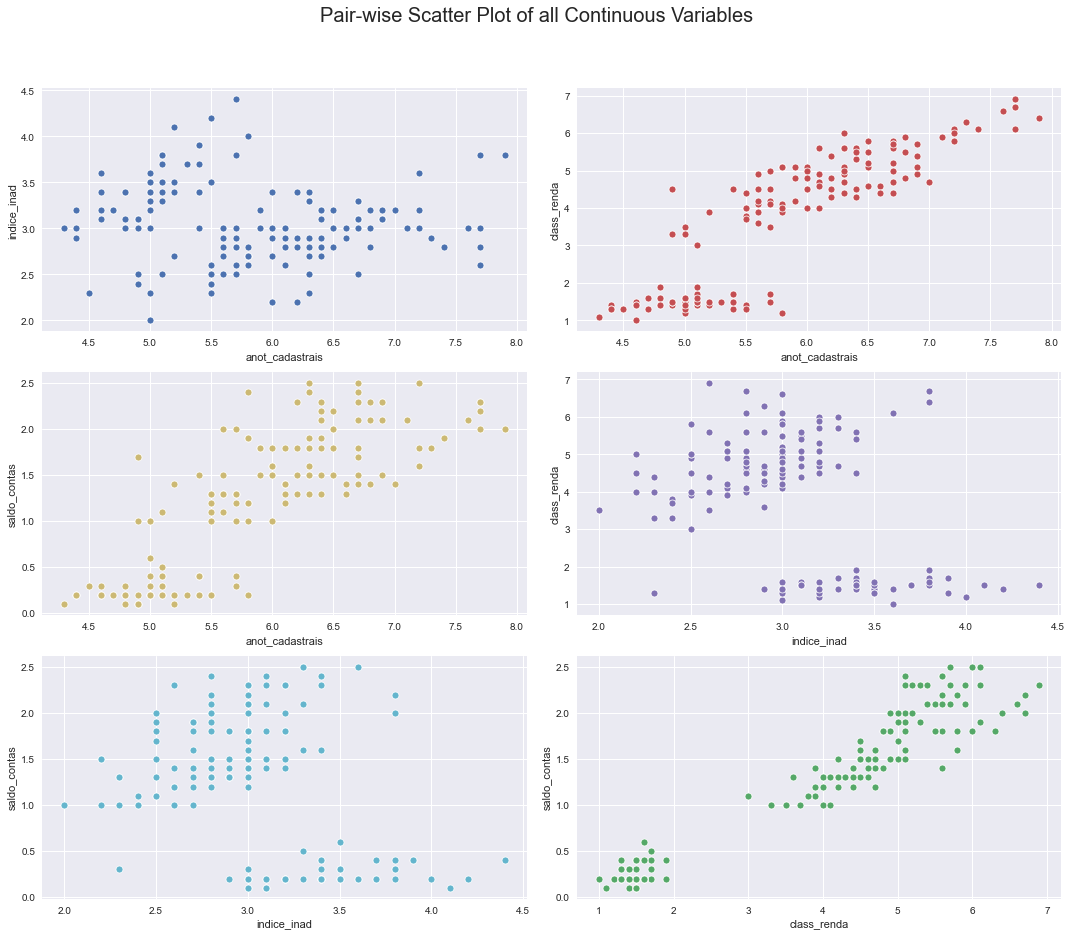

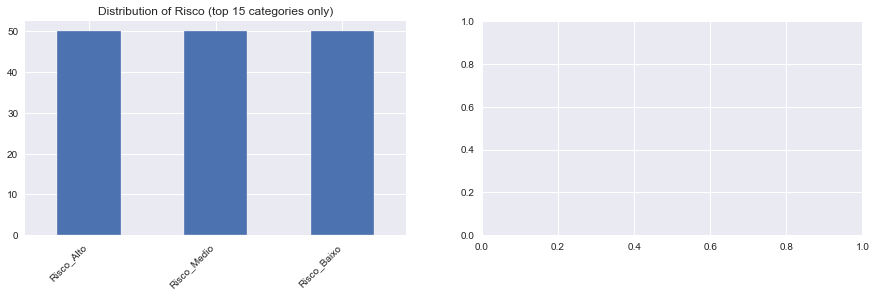

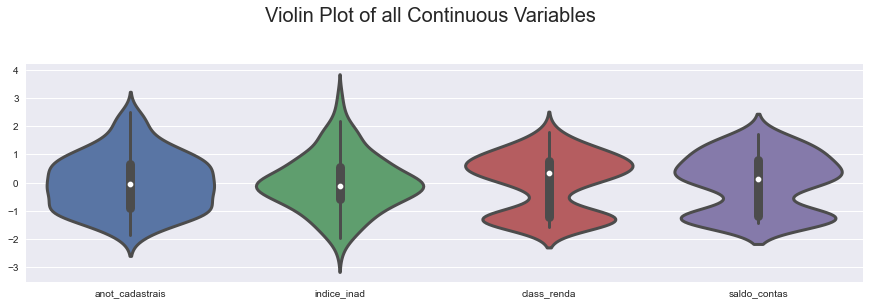

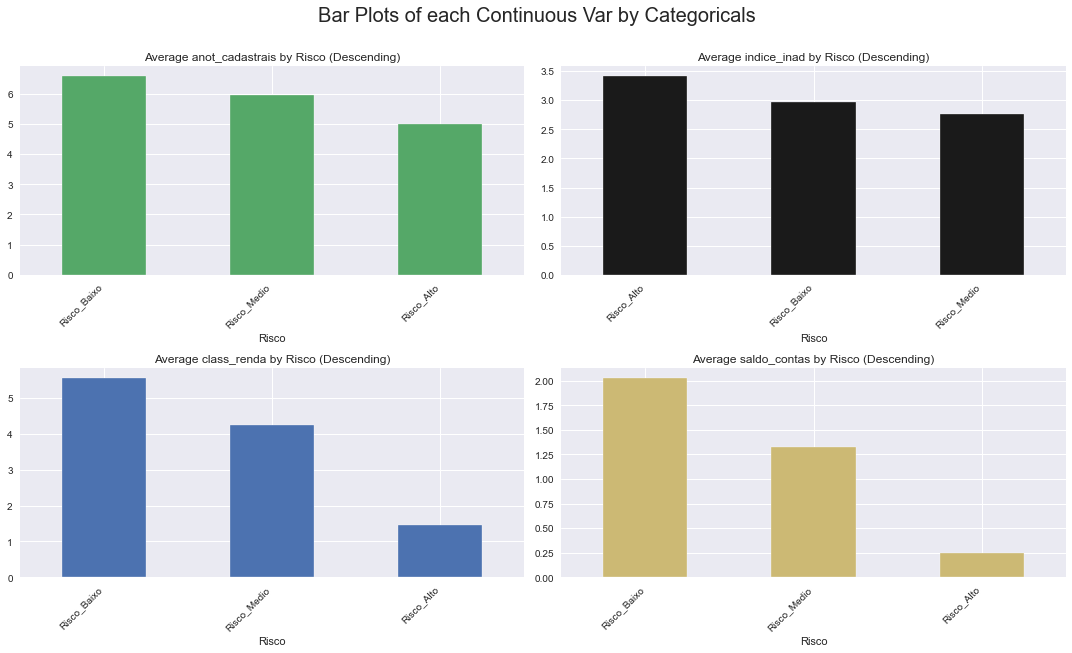

In [1]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
train = AV.AutoViz ("risco.csv")

# <font color='Black'> **Aula 4 - O GPS: Se tornando um Cientista de Dados** </font>

# Fim

![alt text](https://miro.medium.com/max/625/1*XBWI6eNVLS_70s1qS46E1w.gif)